In [1]:
import twixtools
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../../')
sys.path.insert(1, '../')
from util.twix import *
from util.fft import *
from util.entropy import *
import util.simulator as simulate
from util.rank import *
from util.phantom import * 
from tqdm.notebook import tqdm
from util.simulator import * 

In [2]:
import pickle
with open("../lib/SSEPI_data", "rb") as fp:   # Unpickling
    file = pickle.load(fp)
FIGSIZE = (10,6)
pha = file[0]['readouts']
phaflag=file[0]['flags']
data = file[1]['readouts']
dataflag = file[1]['flags']
print(data.shape)

(48, 128, 30)


In [3]:
recon = epi_phasecorrection_lowrank(data, 20)

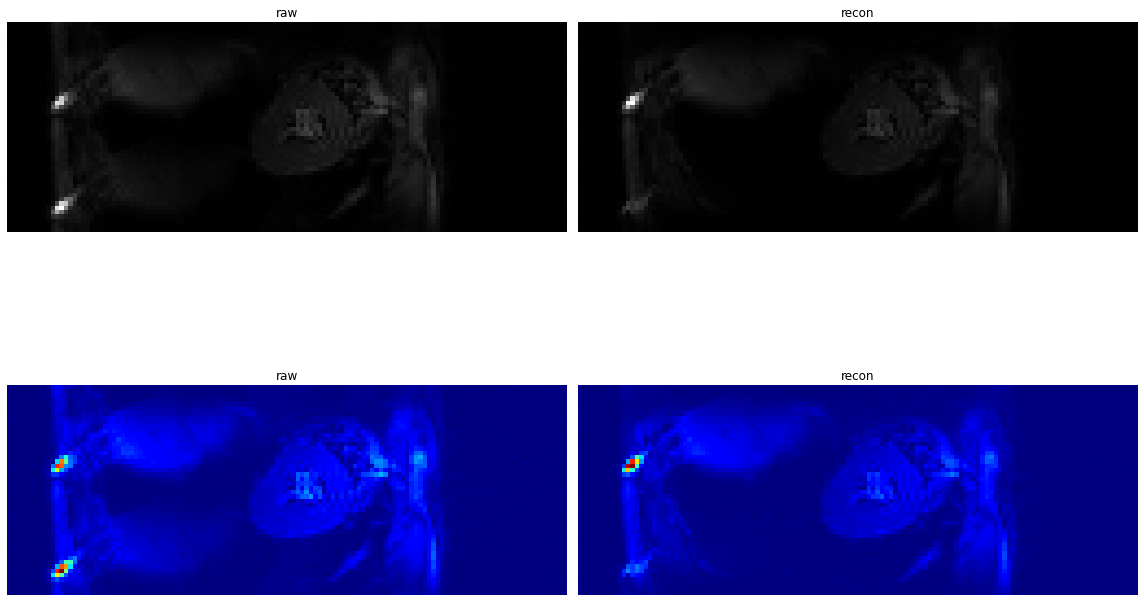

In [6]:
plt.figure(figsize =(16,12))
plt.subplot(221)
plt.axis('off')
plt.title("raw")
plt.imshow(np.abs(rsos(ifft2c(data))), cmap ="gray")
plt.subplot(222)
plt.axis('off')
plt.title("recon")
plt.imshow(np.abs(rsos(ifft2c(recon))), cmap ="gray")
plt.subplot(223)
plt.axis('off')
plt.title("raw")
plt.imshow(np.abs(rsos(ifft2c(data))), cmap ="jet")
plt.subplot(224)
plt.axis('off')
plt.title("recon")
plt.imshow(np.abs(rsos(ifft2c(recon))), cmap ="jet")
plt.tight_layout()
plt.savefig("EPI_lowrank.png")